(569, 31)
(569, 30)
(569,)
(455, 30)
(455,)
Mean Accuracy (Cross-Validation): 0.9254106280193237
Accuracy (Test Set): 0.9473684210526315
Precision (Test Set): 0.9166666666666666
Recall (Test Set): 0.9565217391304348
F1 Score (Test Set): 0.9361702127659574
AUC (Test Set): 0.948849104859335


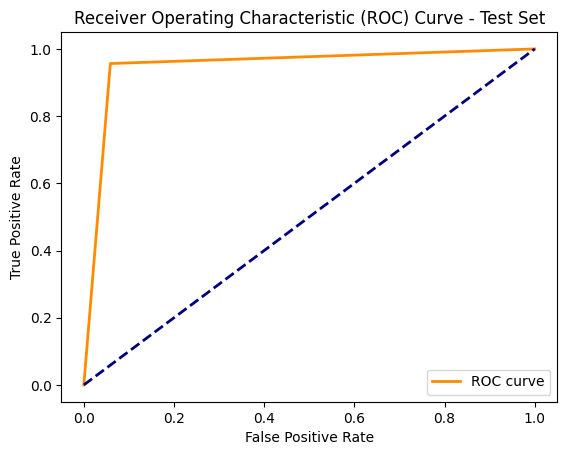

In [1]:
from re import S
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

file_path='/content/project3_dataset1.txt'
# file_path='/content/project3_dataset2.txt'

data=np.loadtxt(file_path)
print(data.shape)



X =  data[:, :-1]
y = data[:, -1]


print((X).shape)
print((y).shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print((X_train).shape)
print((y_train).shape)
y_train = y_train.reshape(-1, 1)



clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')  # You can change scoring to other metrics


print("Mean Accuracy (Cross-Validation):", np.mean(cv_scores))


clf.fit(X_train, y_train)


y_pred_test = clf.predict(X_test)

# Calculate and print metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)

print("Accuracy (Test Set):", accuracy_test)
print("Precision (Test Set):", precision_test)
print("Recall (Test Set):", recall_test)
print("F1 Score (Test Set):", f1_test)
print("AUC (Test Set):", auc_test)

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.show()

# Mean Accuracy (Cross-Validation): 0.9142857142857143
# Accuracy (Test Set): 0.9473684210526315
# Precision (Test Set): 0.9166666666666666
# Recall (Test Set): 0.9565217391304348
# F1 Score (Test Set): 0.9361702127659574
# AUC (Test Set): 0.948849104859335







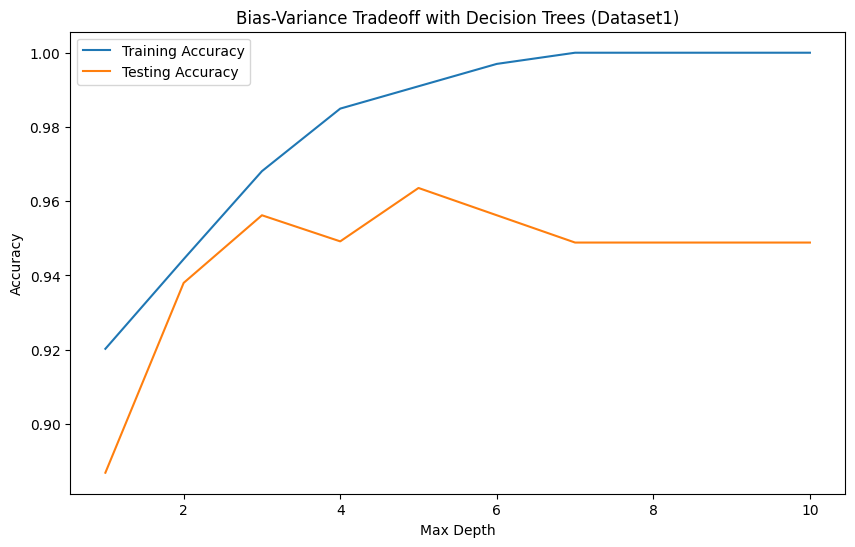

[0.8868286445012787, 0.9379795396419437, 0.9562020460358057, 0.9491687979539642, 0.9635549872122762, 0.9562020460358057, 0.948849104859335, 0.948849104859335, 0.948849104859335, 0.948849104859335]


In [13]:
def train_decision_tree(X_train, y_train, X_test, y_test, max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on training set
    train_predictions = model.predict(X_train)

    # Predictions on testing set
    test_predictions = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    return train_accuracy, test_accuracy




# Experiment with different max depths
max_depths = np.arange(1, 11)
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    train_acc, test_acc = train_decision_tree(X_train, y_train, X_test, y_test, max_depth=depth)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff with Decision Trees (Dataset1)')
plt.legend()
plt.show()
print(test_accuracies)

Rank 1: Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}, Mean Accuracy: 0.9362318840579711
Test Set Metrics:
Accuracy: 0.956140350877193
Precision: 0.9361702127659575
Recall: 0.9565217391304348
F1 Score: 0.9462365591397849
AUC: 0.9562020460358057

Rank 2: Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}, Mean Accuracy: 0.9362318840579711
Test Set Metrics:
Accuracy: 0.956140350877193
Precision: 0.9361702127659575
Recall: 0.9565217391304348
F1 Score: 0.9462365591397849
AUC: 0.9562020460358057

Rank 3: Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}, Mean Accuracy: 0.9340096618357489
Test Set Metrics:
Accuracy: 0.956140350877193
Precision: 0.9361702127659575
Recall: 0.9565217391304348
F1 Score: 0.9462365591397849
AUC: 0.9562020460358057

Rank 4: Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}, Mean Accuracy: 0.9340096618357489
Test Set Metrics:
Accuracy: 0